<a href="https://colab.research.google.com/github/Rafi4010/Power-Lab-Project/blob/main/DSP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Liabraries**

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from keras import layers, models, metrics

## **Importing Data File**

In [2]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/emotions.csv")
data = data.fillna(0)
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.700,2.060,3.1500,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.880,3.830,-4.8200,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.200,89.900,2.0300,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.820,2.300,-1.9700,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.060,41.400,5.5200,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,1.93,21.5,-435.0,1.7,28.8,-3.920,-0.488,1.950,-4.630,0.6310,...,391.0,-173.0,-173.0,391.0,-593.0,496.00,-296.00,-296.00,496.00,NEGATIVE
1524,29.20,30.6,31.4,27.1,23.4,3.880,0.110,0.144,5.060,4.2300,...,-3.4,-25.4,-25.4,-3.4,102.0,-7.90,-10.80,-10.80,-7.90,NEUTRAL
1525,9.03,24.6,-708.0,11.2,25.7,-30.800,2.290,-27.400,2.570,7.1100,...,467.0,-195.0,-195.0,467.0,-1070.0,809.00,-381.00,-381.00,809.00,NEGATIVE
1526,1.46,26.2,-710.0,11.4,26.1,9.210,-1.770,27.800,-0.445,0.0811,...,371.0,-136.0,-136.0,371.0,-1120.0,834.00,-351.00,-351.00,834.00,NEGATIVE


## **Encoding Labels**

In [3]:
cleanup = {"label":
           {
                "POSITIVE" : 1,
                "NEGATIVE" : 2,
                "NEUTRAL" : 0
           }}
df = data.replace(cleanup)
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.700,2.060,3.1500,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.880,3.830,-4.8200,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.200,89.900,2.0300,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.820,2.300,-1.9700,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.060,41.400,5.5200,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,1.93,21.5,-435.0,1.7,28.8,-3.920,-0.488,1.950,-4.630,0.6310,...,391.0,-173.0,-173.0,391.0,-593.0,496.00,-296.00,-296.00,496.00,2
1524,29.20,30.6,31.4,27.1,23.4,3.880,0.110,0.144,5.060,4.2300,...,-3.4,-25.4,-25.4,-3.4,102.0,-7.90,-10.80,-10.80,-7.90,0
1525,9.03,24.6,-708.0,11.2,25.7,-30.800,2.290,-27.400,2.570,7.1100,...,467.0,-195.0,-195.0,467.0,-1070.0,809.00,-381.00,-381.00,809.00,2
1526,1.46,26.2,-710.0,11.4,26.1,9.210,-1.770,27.800,-0.445,0.0811,...,371.0,-136.0,-136.0,371.0,-1120.0,834.00,-351.00,-351.00,834.00,2


## **Generating X and y Matrices**

In [4]:
from math import log
X = df.iloc[:, 0:-2]
y = df.iloc[:, -1]

#X = (X - X.mean()) / X.std()
X = np.log10(abs(X) + 10**-0.000005)

In [5]:
X

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b
0,0.749735,1.495544,2.552668,1.220108,1.436162,0.315968,0.149523,1.222716,0.485720,0.618047,...,2.574031,1.876795,1.389166,1.328379,1.328379,1.389166,2.334454,2.448706,2.212188,2.212188
1,1.474216,1.532754,1.518514,1.428135,1.376577,0.877946,0.428133,0.588830,0.683946,0.764922,...,1.301030,2.117271,1.385606,1.357935,1.357935,1.385606,2.262451,0.552667,1.513217,1.513217
2,0.995635,1.482873,2.620136,1.247973,1.392697,1.907948,0.639485,1.959995,1.958564,0.481441,...,2.204120,2.728354,2.665581,2.369216,2.369216,2.665581,2.428135,2.450249,2.173186,2.173186
3,1.201397,1.513217,2.158362,1.318063,1.403120,0.199752,0.108561,0.992111,0.518512,0.472755,...,1.798651,2.264818,2.477121,2.387390,2.387390,2.477121,2.123852,1.127104,1.022428,1.022428
4,1.466867,1.509202,1.664642,1.451786,1.406540,1.553883,0.831869,0.608525,1.627366,0.814247,...,1.227886,2.060698,1.113943,1.592177,1.592177,1.113943,2.079181,1.269513,1.396199,1.396199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,0.466866,1.352182,2.639486,0.431362,1.474216,0.691964,0.172600,0.469820,0.750508,0.212451,...,2.378398,2.502427,2.593286,2.240549,2.240549,2.593286,2.773786,2.696356,2.472756,2.472756
1524,1.480007,1.499687,1.510545,1.448706,1.387390,0.688419,0.045318,0.058422,0.782472,0.718501,...,0.664641,1.955688,0.643452,1.421604,1.421604,0.643452,2.012837,0.949389,1.071882,1.071882
1525,1.001300,1.408240,2.850646,1.086359,1.426511,1.502427,0.517194,1.453318,0.552667,0.909020,...,2.696356,2.733197,2.670246,2.292256,2.292256,2.670246,3.029789,2.908485,2.582063,2.582063
1526,0.390933,1.434569,2.851870,1.093421,1.432969,1.009025,0.442478,1.459392,0.159864,0.033861,...,2.717670,2.357935,2.570543,2.136721,2.136721,2.570543,3.049606,2.921686,2.546543,2.546543


# **Handling Imbalances**

In [6]:
y.value_counts()

0    524
1    507
2    497
Name: label, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
X_sm, y_sm = smote.fit_resample(X_sm, y_sm)

In [8]:
y_sm.value_counts(), X_sm.shape

(2    524
 0    524
 1    524
 Name: label, dtype: int64, (1572, 2547))

In [9]:
X_final = np.array(X_sm).reshape((X_sm.shape[0], -1, 1))
y_final = np.array(y_sm).reshape((y_sm.shape[0], -1, 1))

X_final.shape, y_final.shape

((1572, 2547, 1), (1572, 1, 1))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=15)

In [11]:
X_train.shape, y_train.shape, X_test.shape

((1257, 2547, 1), (1257, 1, 1), (315, 2547, 1))

# **Creating CNN Model**

In [12]:
cnn = models.Sequential()

# Convolution Layer
cnn.add(layers.Conv1D(filters = 512, kernel_size=3, input_shape=(X_final.shape[1], X_final.shape[2]), activation='relu', padding='same'))

cnn.add(layers.Conv1D(filters = 512, kernel_size=3, activation='relu', padding='same'))

cnn.add(layers.Conv1D(filters = 1024, kernel_size=3, activation='relu', padding='same'))

cnn.add(layers.Conv1D(filters = 256, kernel_size=3, activation='relu', padding='same'))

# Dense Layer
cnn.add(layers.Flatten())

cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dropout(0.4))

cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dropout(0.4))

cnn.add(layers.Dense(3, activation='softmax'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2547, 512)         2048      
                                                                 
 conv1d_1 (Conv1D)           (None, 2547, 512)         786944    
                                                                 
 conv1d_2 (Conv1D)           (None, 2547, 1024)        1573888   
                                                                 
 conv1d_3 (Conv1D)           (None, 2547, 256)         786688    
                                                                 
 flatten (Flatten)           (None, 652032)            0         
                                                                 
 dense (Dense)               (None, 256)               166920448 
                                                                 
 dropout (Dropout)           (None, 256)               0

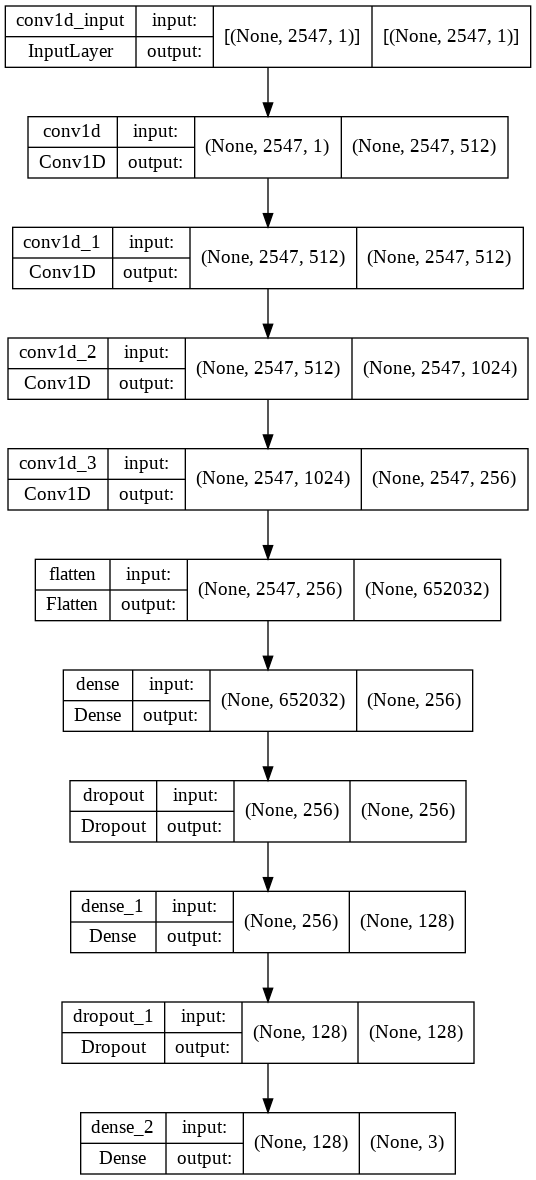

In [14]:
from keras.utils.vis_utils import plot_model

plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
cnn.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 150, 
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ])

Epoch 1/150
32/32 [==============================] - 36s 619ms/step - loss: 1.2979 - accuracy: 0.6159 - val_loss: 0.3786 - val_accuracy: 0.8849
Epoch 2/150
32/32 [==============================] - 15s 480ms/step - loss: 0.4051 - accuracy: 0.8657 - val_loss: 0.2128 - val_accuracy: 0.9246
Epoch 3/150
32/32 [==============================] - 16s 488ms/step - loss: 0.2511 - accuracy: 0.9164 - val_loss: 0.1759 - val_accuracy: 0.9286
Epoch 4/150
32/32 [==============================] - 15s 479ms/step - loss: 0.1618 - accuracy: 0.9353 - val_loss: 0.2251 - val_accuracy: 0.9246
Epoch 5/150
32/32 [==============================] - 16s 497ms/step - loss: 0.1086 - accuracy: 0.9652 - val_loss: 0.1210 - val_accuracy: 0.9643
Epoch 6/150
32/32 [==============================] - 16s 504ms/step - loss: 0.0663 - accuracy: 0.9771 - val_loss: 0.1059 - val_accuracy: 0.9683
Epoch 7/150
32/32 [==============================] - 16s 498ms/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.2396 - val_accuracy:

# **Classification Report**

In [17]:
cnn.evaluate(X_test, y_test)

10/10 [==============================] - 3s 268ms/step - loss: 0.1699 - accuracy: 0.9587


[0.16987094283103943, 0.958730161190033]

In [18]:
# Classification report on train data
from sklearn.metrics import classification_report

names = ['neutral', 'positive', 'negative']

pred = cnn.predict(X_test)

p = []
for i in range(y_test.shape[0]):
  p.append(np.argmax(pred[i]))

y_truth = y_test.flatten().tolist()

print(classification_report(y_truth, p, target_names = names))


              precision    recall  f1-score   support

     neutral       1.00      0.97      0.98        99
    positive       0.92      0.96      0.94       111
    negative       0.96      0.94      0.95       105

    accuracy                           0.96       315
   macro avg       0.96      0.96      0.96       315
weighted avg       0.96      0.96      0.96       315



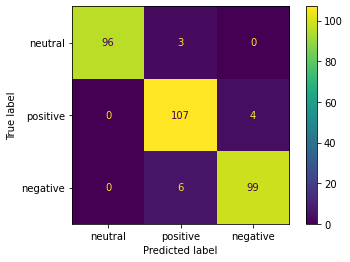

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_truth, p)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = names)
disp.plot()
plt.show()

In [24]:
cnn.save("/content/drive/MyDrive/BUET/eeg.h5")

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/BUET/eeg.h5")

In [27]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 2s 157ms/step - loss: 0.1699 - accuracy: 0.9587


[0.16987094283103943, 0.958730161190033]